# QCTO - Workplace Module

### Project Title: Global Vegetable Yield
#### Done By: Kyle Ebrahim

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a><br>
<ol>
<a href=#six.one>Simple Linear Regression (SLR) </a><br>
<a href=#six.one>Multiple Linear Regression (SLR) </a><br>
<a href=#six.two>RandomForest </a>
</ol>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this project is to use predictive and classification algorithms to predict the use pesticides in tonnes and classify the crop type respectively based on specific features.
* **Details:** 
By predicting the use of pesticides in tonnes we can assist farmers in managing one of their biggest costs for the farming season and by classifying crop types we can determine the crop most likely farmed in certain conditions such as rainfall and yield.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [24]:
#Installing own package to check for nulls and duplicates
#!pip install git+https://github.com/KGEbrahim/Workplace-project.git@cleaning-branch

In [53]:
# Packages for data cleaning and EDA
import pandas as pd
import numpy as np
import re

# Importing custom package for cleaning
from Packages.Packages import cleaning as cle

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To use statistical tools and preprocessing
from scipy.stats import stats
from sklearn.preprocessing import OneHotEncoder, label_binarize

# Packages for modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [26]:
# Importing dataset using pandas and confirming source

"""
The yield dataset was sourced from Kaggle and represents various features of agricultural production and environmental factors across different countries
"""

# Reading in csv data with pandas
df = pd.read_csv(r'C:\Users\kgerr\OneDrive\Documents\ExploreAI\Workplace local\yield_df.csv')
df_copy = df
df_copy

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [27]:
# Importing dataset using pandas and confirming source

df = pd.read_csv(r'C:\Users\kgerr\OneDrive\Documents\ExploreAI\Workplace local\yield_df.csv')

# From observing the columns a few code cells below I picked up that the unnamed column was used as an index but this is not needed and will be dropped
df.drop(columns=['Unnamed: 0'], inplace=True)

# Creating a copy of the dataframe as a safey measure when modifying the dataframe
df_copy = df
df_copy.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [28]:
'''
The yield dataset was sourced from Kaggle and represents various features of agricultural production and environmental factors across different countries, this was loaded into the workbook using pandas.

It appears to be cleaned already for creating statistical models.
The dataset contains float, int and object data types, 6 columns including an unnamed column and 28424 rows.
'''

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [29]:
df_copy.head()
# Previously: Unnamed: 0	Area	Item	Year	hg/ha_yield	average_rain_fall_mm_per_year	pesticides_tonnes	avg_temp

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [30]:
# Basic summary check of the numerical variables

df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


**Findings**: 
- The dataset seems to contain data from 1990 to 2013.
- The hectograms per hectare (hg/ha) column would require further understanding of the measurement used.
- The rest of the variables are straightforward, grouping of these variables with aggregations and sorting them should give us more insights.

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [31]:
# Checking for nulls and duplicates

cle.findnulls_duplicates(df_copy)

Number of row duplicates: 2310


,null_rows
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0



The dataset appears to be clean from nulls however, 2310 duplicate rows were picked up and will be dropped.

In [32]:
# Assigning non-duplicate values back to df_copy

df_copy = cle.duplicates_removed(df_copy)
df_copy

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
25927,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
25928,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
25929,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
25930,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


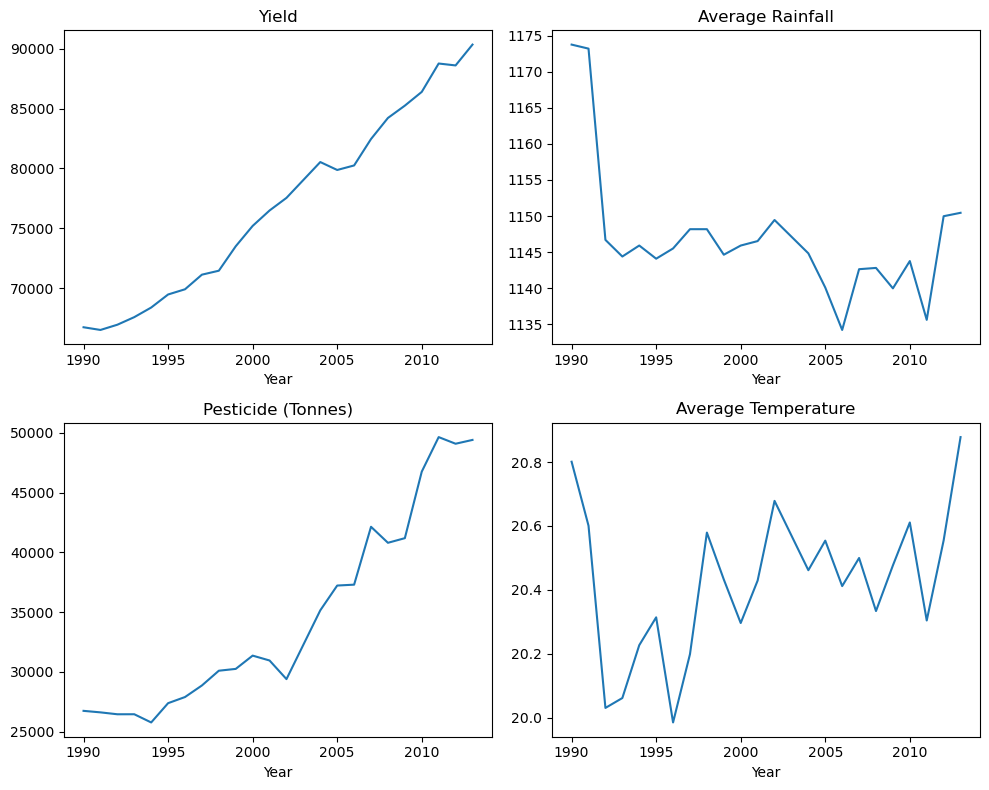

In [33]:
# Exploring the data
"""
The column hg/ha_yield is a measurement of yield 1 hectogram or 100 grams per hector (10000m^2).
Average rainfall in millimetres per year is self-explanatory.
pesticides_tonnes is the measurement of the use of pesticides in tonnes.
"""
# Segment plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plotting averages by time series
df_copy.groupby('Year')['hg/ha_yield'].mean().plot(title= 'Yield', ax=ax[0, 0])
df_copy.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot(title='Average Rainfall', ax=ax[0, 1])
df_copy.groupby('Year')['pesticides_tonnes'].mean().plot(title='Pesticide (Tonnes)', ax=ax[1, 0])
df_copy.groupby('Year')['avg_temp'].mean().plot(title= 'Average Temperature', ax=ax[1, 1])

# Display plots
plt.tight_layout()
plt.show()

- Yield and pesticide use have increase steadily, with the pesticides and average temperatures having more variability than the yield. Rainfal has maintained a constant average over a decade with considerable dips between 2005 and 2010.
---

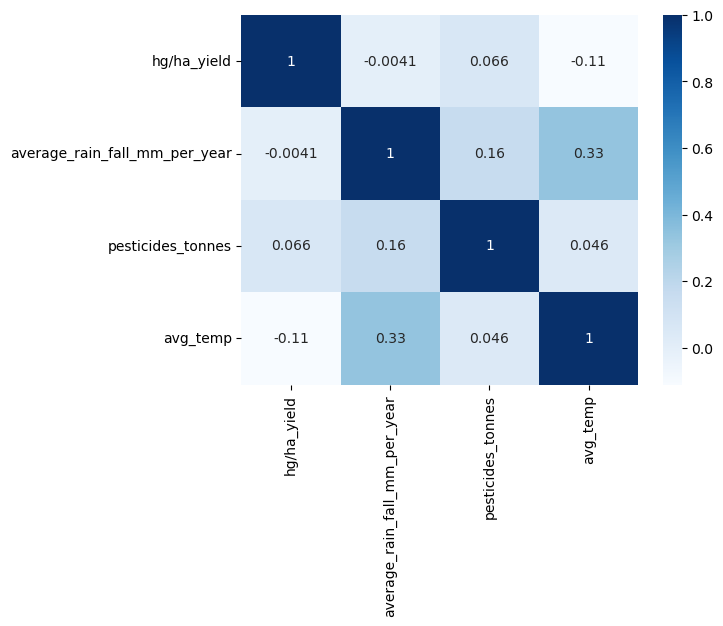

In [34]:
# Visualising correlation using a heatmap

# Store numeric features
num_cols = df_copy.iloc[:, 3:].corr()

sns.heatmap(num_cols, cmap = 'Blues', annot=True)
plt.show()

- There appears to be low levels of correlation amoung the numerical features of the dataset.
- This can be a good thing to ensure lower multicollinearity however, there should still be relevance of features when creating models.
---

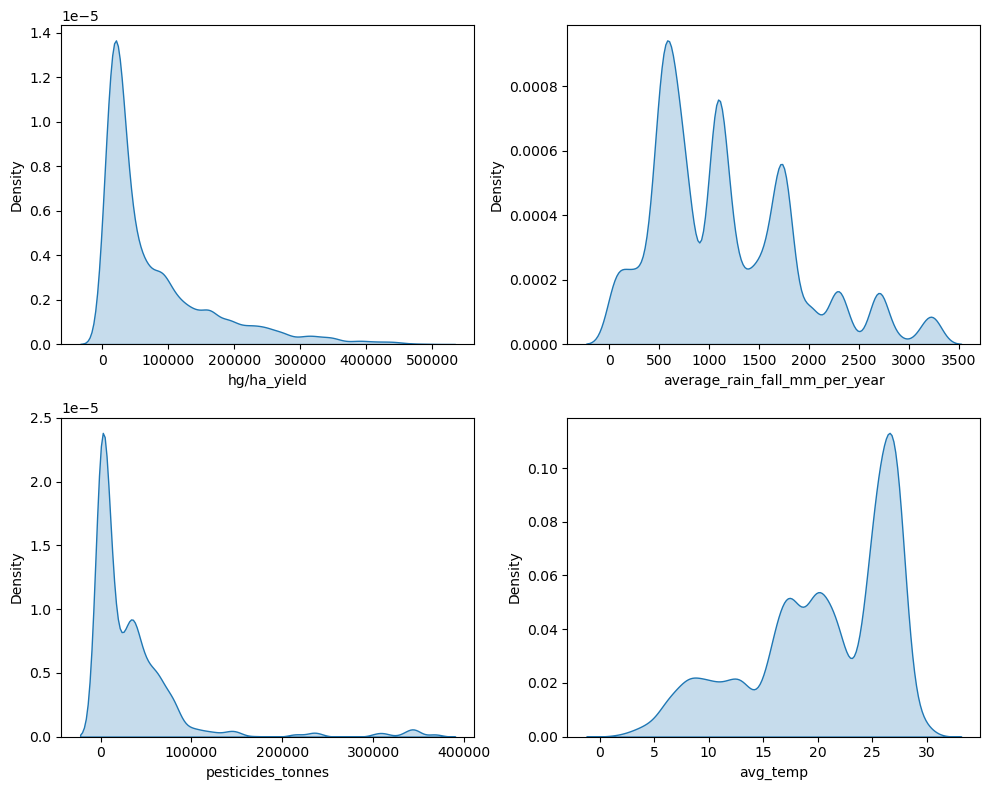

In [35]:
# Creating a KDE plot

# Segment plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plot each feature on different axis
sns.kdeplot(df_copy['hg/ha_yield'], fill = True, ax=ax[0, 0])
sns.kdeplot(df_copy['average_rain_fall_mm_per_year'], fill = True, ax=ax[0, 1])
sns.kdeplot(df_copy['pesticides_tonnes'], fill = True, ax=ax[1, 0])
sns.kdeplot(df_copy['avg_temp'], fill = True, ax=ax[1, 1])

# Display plots
plt.tight_layout()
plt.show()

- Yield and pesticides are skewed to the right indicating that the distribution of the observations in the dataset are more concentrated in the lower values compared to the higher.
- Average temp has a left skew with several peaks indicating the opposite of yield and pesticides.
- Average rainfall has several peaks as welll and then a drop-off from 2000mm.
---

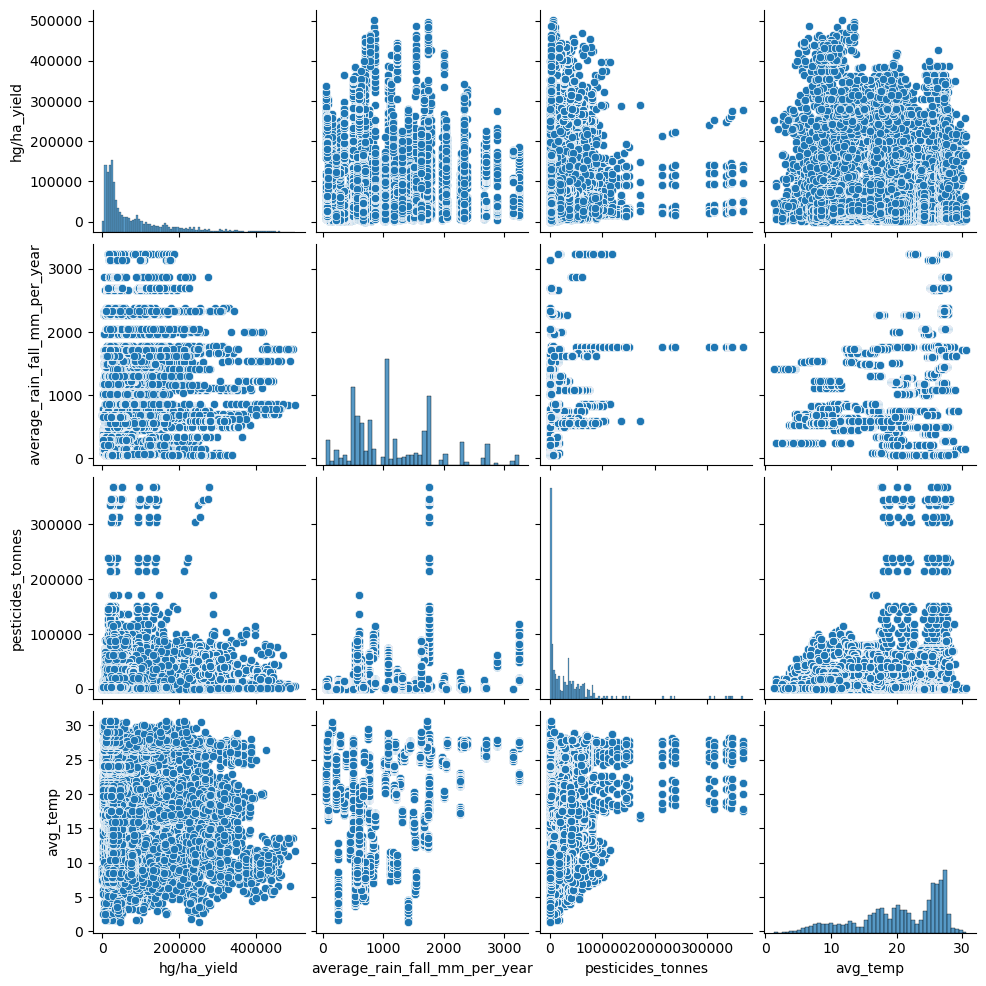

In [36]:
# Creating pairplots to visualize relationships amoung numerical columns

sns.pairplot(df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']])
plt.show()

- No clear trends in any of the features, just concentrations of data in the lower points for yield and pesticides for example.
---

In [37]:
# Taking a closer look at the types of vegetables and pesticide usage for the latest decade
latest_decade_df = df[df['Year'] > 2003]
vegpest_by_year = latest_decade_df.groupby(['Item', 'Year'])['pesticides_tonnes'].sum().reset_index()

# Sending to dataframe
pivot_df = vegpest_by_year.pivot_table(index='Item', columns='Year', values='pesticides_tonnes')

# Visualizing the results
pivot_df_reset = pivot_df.reset_index().melt(id_vars='Item', var_name='Year', value_name='Pesticides Tonnes')
fig = px.bar(pivot_df_reset, x='Item', y='Pesticides Tonnes', color='Year', title='Pesticide Usage per Item Over Years', text='Pesticides Tonnes')

# Correct text position for bar chart
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

- Steady increases in the use of pesticides over the latest decade.

In [38]:
# Taking a closer look at the types of vegetables and yield for the latest decade
latest_decade_df = df[df['Year'] > 2003]
vegpest_by_year = latest_decade_df.groupby(['Item', 'Year'])['hg/ha_yield'].sum().reset_index()

# Sending to dataframe
pivot_df = vegpest_by_year.pivot_table(index='Item', columns='Year', values='hg/ha_yield')

# Visualizing the results
pivot_df_reset = pivot_df.reset_index().melt(id_vars='Item', var_name='Year', value_name='hg/ha_yield')
fig = px.bar(pivot_df_reset, x='Item', y='hg/ha_yield', color='Year', title='Yield per Item Over Years', text='hg/ha_yield')

# Correct text position for bar chart
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

- No considerable increases in the yield but clear indications of the amount of yield for items like `Cassava`, `Potatoes` and `Sweet potatoes` in hg/ha.
- This could be due to the crop covering more area for this measurement.

In [39]:
# Checking for outliers using z-score
import scipy.stats as stats

# Pass numeric cols
z_scores = np.abs(stats.zscore(num_cols))

# Store outliers
outliers = num_cols[(z_scores>3).any(axis=1)]

# Filter df with indices of outliers var
df_copy.loc[outliers.index]

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


- No outliers picked up using z-scores

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** In line with the progression of the course, I will display skills of Simple Linear Regression, Multiple Linear Regression
---

In [40]:
# Drop categorical features
df_copy = df_copy.drop(columns=['Area', 'Item'], axis=1)

<a href=#six.one></a>
### **Simple Linear Regression**

In [41]:
# Store variables for fitting
X = df_copy[['hg/ha_yield']]
y = df_copy['pesticides_tonnes']

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the X data to improve scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model
slr = LinearRegression().fit(X_train, y_train)

# Predict y-values
slr_y_pred = slr.predict(X_test)

# Evaluate test scores
slr_mse = metrics.mean_squared_error(y_test, slr_y_pred)
slr_mae = metrics.mean_absolute_error(y_test, slr_y_pred)
slr_rscore = metrics.r2_score(y_test, slr_y_pred)

print(f"Mean Squared Error: {slr_mse} \nMean Absolute Error: {slr_mae} \nR2 Score: {slr_rscore}")


Mean Squared Error: 3562594401.130794 
Mean Absolute Error: 34959.971049775195 
R2 Score: 0.002767929067342134


- The poor metric scores suggest that the model does not suit the data in the prediction of pesticides at all.
---

<a href=#six.two></a>
### **Random Forest**

In [42]:
# Initialize and fit the model
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Predict y-values
rf_y_pred = rf.predict(X_test)

# Evaluate test scores
rf_mse = metrics.mean_squared_error(y_test, rf_y_pred)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_pred)
rf_rscore = metrics.r2_score(y_test, rf_y_pred)

print(f"Mean Squared Error: {rf_mse} \nMean Absolute Error: {rf_mae} \nR2 Score: {rf_rscore}")

Mean Squared Error: 498388148.61110157 
Mean Absolute Error: 9316.685356169963 
R2 Score: 0.8604924979924777


- Much better scores than simple linear regression however, the model is off by 9168 tonnes as suggested by the MAE.
- Let's first try multiple linear regression before improving our random forest regressor.
---

<a href=#six.two></a>
### **Multiple Linear Regression**

In [43]:
# Store variables for fitting
y = df_copy['pesticides_tonnes']
X = df_copy.drop(y.name, axis=1)

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the X data to improve scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model
mlr = LinearRegression().fit(X_train, y_train)

# Predict y-values
mlr_y_pred = mlr.predict(X_test)

# Evaluate test scores
mlr_mse = metrics.mean_squared_error(y_test, mlr_y_pred)
mlr_mae = metrics.mean_absolute_error(y_test, mlr_y_pred)
mlr_rscore = metrics.r2_score(y_test, mlr_y_pred)

print(f"Mean Squared Error: {mlr_mse} \nMean Absolute Error: {mlr_mae} \nR2 Score: {mlr_rscore}")

Mean Squared Error: 3394123347.381943 
Mean Absolute Error: 35204.137900049136 
R2 Score: 0.0499259041006066


- The improvement from simple to multiple linear regression is significant but the scores are still really poor to have a usable model.
---

<a href=#six.two></a>
### **Random Forest Regressor**

In [44]:
# Initialize and fit the model with all possible predictors
rf2 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=4).fit(X_train, y_train)

# Predict y-values
rf_y_pred2 = rf2.predict(X_test)

# Evaluate test scores
rf2_mse = metrics.mean_squared_error(y_test, rf_y_pred2)
rf2_mae = metrics.mean_absolute_error(y_test, rf_y_pred2)
rf2_rscore = metrics.r2_score(y_test, rf_y_pred2)

print(f"Mean Squared Error: {rf2_mse} \nMean Absolute Error: {rf2_mae} \nR2 Score: {rf2_rscore}")

Mean Squared Error: 140090.76629651053 
Mean Absolute Error: 54.26394793718144 
R2 Score: 0.9999607861605161


- The Random Forest Regressor predicts the use of pesticide really well.
- This model, technically, explains 100% of the underlying relationship.
- We will further validate the scores using cross validation to ensure the model is fitting with the least amount of bias.

### **Random Forest Regressor (Cross-validation)**

In [58]:
# Initialize rfc model object without fitted data
rf2 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=4)

# scoring variable for mae, mse and r2 score
scoring =['neg_mean_absolute_error','neg_mean_squared_error','r2']

# Create scores with 10 folds
rf_scores = cross_validate(rf2, X_train, y_train, cv=15, scoring=scoring)

# print scores
print("Mean Squared Error for each fold:", -rf_scores['test_neg_mean_squared_error'])
print("Mean Absolute Error for each fold:", -rf_scores['test_neg_mean_absolute_error'])
print("R^2 for each fold:", rf_scores['test_r2'])
print("Average Mean Squared Error:", -rf_scores['test_neg_mean_squared_error'].mean())
print("Average Mean Absolute Error:", -rf_scores['test_neg_mean_absolute_error'].mean())
print("Average R^2:", rf_scores['test_r2'].mean())


Mean Squared Error for each fold: [ 202512.98370034  147037.34692124 1159201.60080858  298974.92996232
  204134.86949004   88183.27583575  626503.23907614  471170.25661158
  543896.52512475  135955.79636962   73065.9009133   830347.20916536
  352985.94345702  739773.33715059  298077.84797725]
Mean Absolute Error for each fold: [ 66.00878778  64.90667419  90.07405394  76.37184302  59.67291338
  58.69905586  74.7220141   66.98680405  71.29581323  66.81317805
  49.12211222  93.98265611  76.24229215 114.35098706  86.34722393]
R^2 for each fold: [0.99992853 0.99995829 0.99957942 0.99990705 0.99993973 0.99997515
 0.99979291 0.99986128 0.99981638 0.9999623  0.99997746 0.99978308
 0.99987921 0.99974212 0.9998952 ]
Average Mean Squared Error: 411454.7375042588
Average Mean Absolute Error: 74.37309393832675
Average R^2: 0.9998665404283986


- I've manually tried folds from 5-15 to avoid the computational cost and wait time using a for loop and noticed that the mse score increased significantly from the train-test scores and this could indicate data leakage by using this method.
- The absolute error improved from ~110 to 74.37 as the folds increased from 5 to 15 and the r2 score remained relatively unchanged.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

### **Simple Linear Regression**

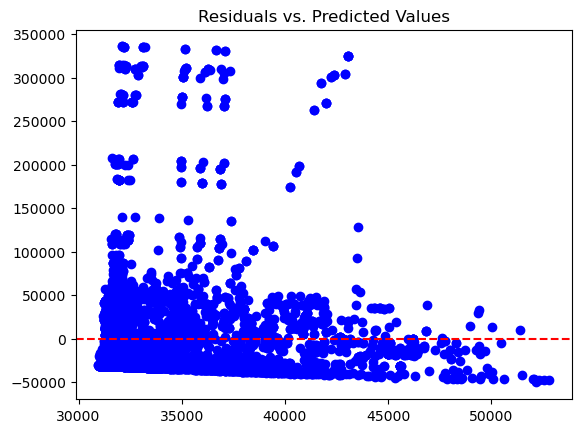

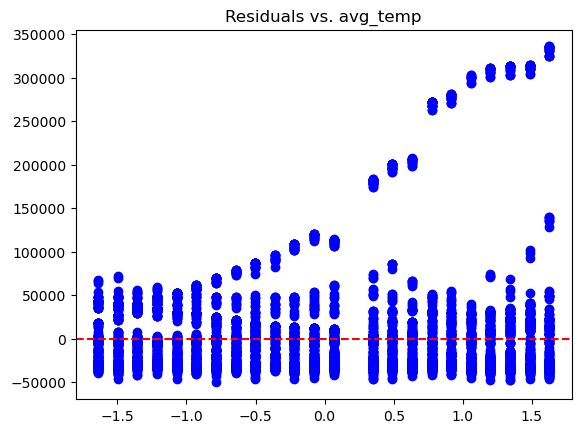

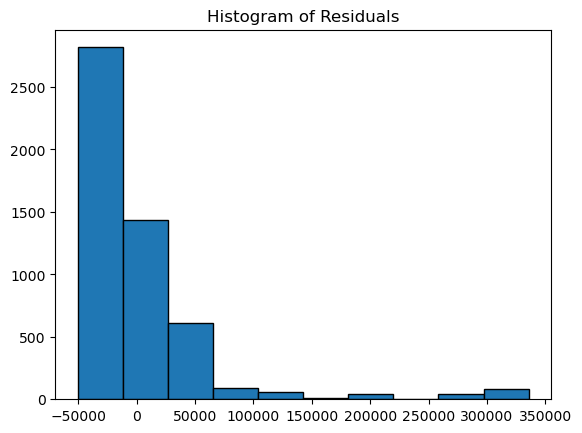

In [21]:
# Residual analysis
slr_residuals = y_test - slr_y_pred

# Residuals vs. Predicted Values
plt.scatter(slr_y_pred, slr_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Residuals vs. Independent Variable
plt.scatter(X_test[:, 0], slr_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. avg_temp')
plt.show()

# Histogram of Residuals
plt.hist(slr_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

- The scatter plots display clear signs of heteroscedasticity, a non-uniform spread of errors above and below the zero line, the histogram displays large spreads of errors and a right skew, suggesting predictions are below the actual values.
- There is clear clustering of residuals versus actual values in the lower ends of the plots and a pattern-following variance of residuals with predicted values and average temperature.

### **Multiple Linear Regression**

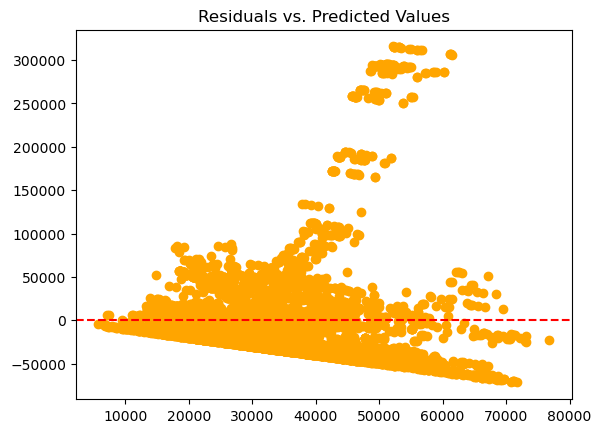

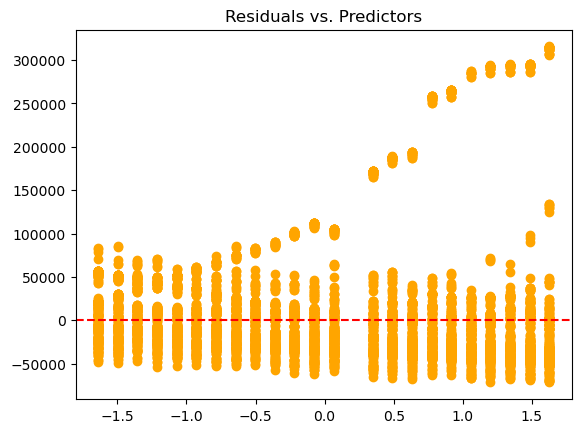

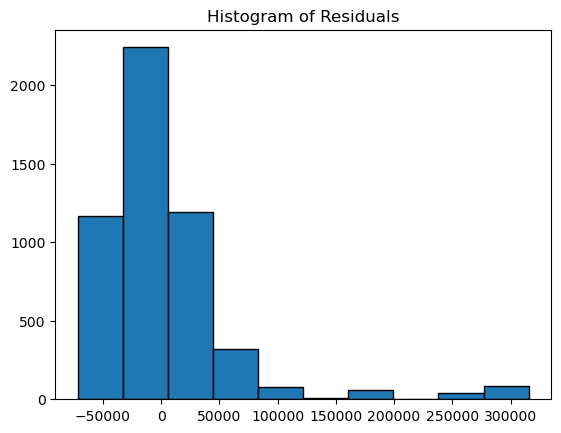

In [22]:
# Residual analysis
mlr_residuals = y_test - mlr_y_pred

# 1. Residuals vs. Predicted Values
plt.scatter(mlr_y_pred, mlr_residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# 2. Residuals vs. Independent Variable
plt.scatter(X_test[:, 0], mlr_residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predictors')
plt.show()

# 3. Histogram of Residuals
plt.hist(mlr_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

- There is a clear pattern of residuals spread unevenly, suggesting hetereoscedasticity, especially at higher predictions.
- Similar issue arises with the predictors, there is a clear pattern in this visual as well suggesting that some relationships are not linear (possible multicollinearity).
- The distribution of the residuals show a centering of the errors at the zero point however, there are left and right long tails.

### **Random Forest Regressor**

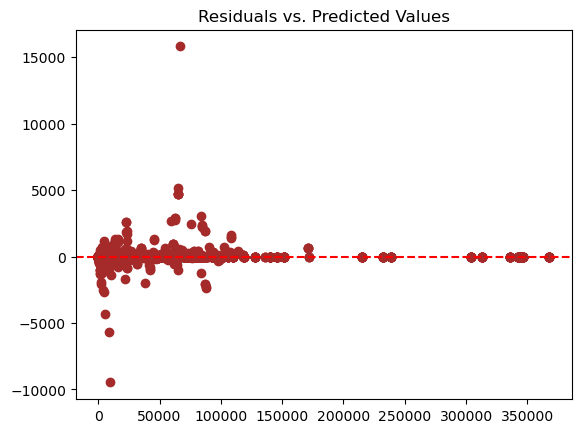

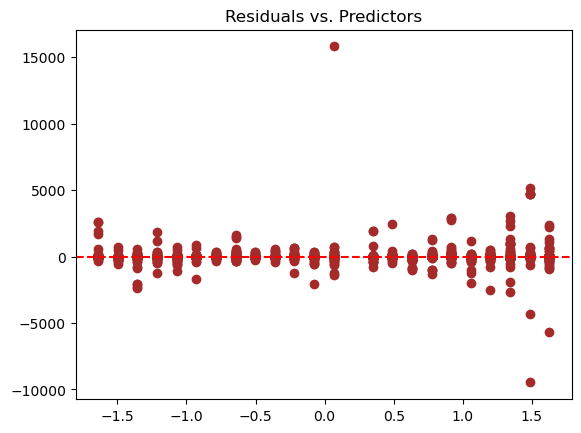

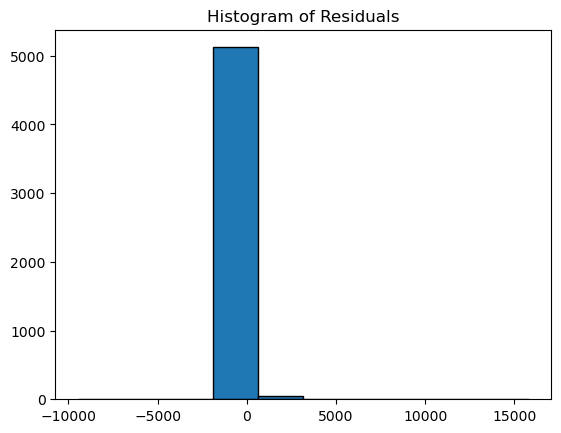

In [23]:
# Calculate residuals
rf2_residuals = y_test - rf_y_pred2

# Residuals vs. Predicted values
plt.scatter(rf_y_pred2, rf2_residuals, color="brown")
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Residuals vs predictors
plt.scatter(X_test[:, 0], rf2_residuals, color='brown')
plt.axhline(y=0, color='red', linestyle= '--')
plt.title("Residuals vs. Predictors")
plt.show()

# Distribution of residuals
plt.hist(rf2_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

- There are no patterns in the residuals against the predictions, just more spread in the lower parts.
- Same thing with the predictors, no clear pattern and general centering around zero.
- The distribution of residuals remain much closer to zero this time, with a slight lean to both short tails.

## **Classification**

#### This section will focus on classification algorithms and fitting the categorical feature 'Item'

#### **Preprocessing**

In [24]:
# Getting data with target feature, I will be removing Year and Area as these are not relevant features for classifying crops.
df_class = df.drop(columns=['Year', 'Area'], axis=1)

In [25]:
# Check for class imbalance
df_class['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [26]:
# Initialize encoder
item_encoder = OneHotEncoder()

# Apply encoder
item_encoded = item_encoder.fit_transform(df_class[['Item']]).toarray()

# Get features from arrays
item_encoded_df = pd.DataFrame(item_encoded, columns=item_encoder.get_feature_names_out(['Item']))

# Concat results to original dataframe
df_class = pd.concat([df_class, item_encoded_df], axis=1)

In [27]:
# Drop Item column after encoding
df_class = df_class.drop(columns='Item', axis=1)

### **Logistic Regression**

In [28]:
# Separate X and y
y = np.argmax(df_class[[col for col in df_class.columns if col.startswith('Item_')]].values, axis=1)
X = df_class.drop(columns=[col for col in df_class.columns if col.startswith('Item_')])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model with 
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit model and predict
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Print results
logreg_accuracy = logreg.score(X_test, y_test)
logf1 = f1_score(y_test, logreg_preds, average='weighted')
print(f"Accuracy: {logreg_accuracy}")
print(f"F1 score: {logf1}")

Accuracy: 0.370154009559214
F1 score: 0.3578258264014258


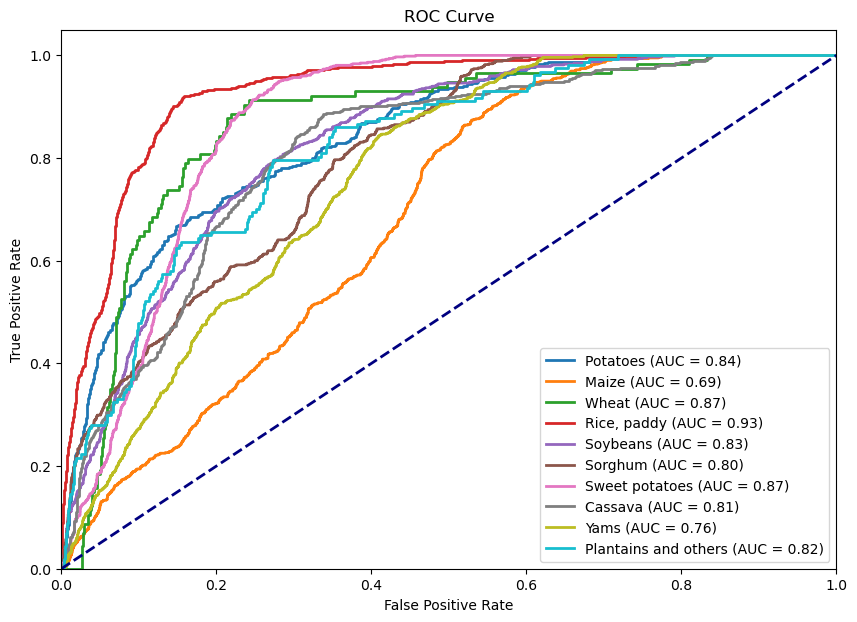

In [42]:
#Create class mapping to display item names in the legend
class_mapping = {
    0: 'Potatoes', 
    1: 'Maize', 
    2: 'Wheat', 
    3: 'Rice, paddy', 
    4: 'Soybeans', 
    5: 'Sorghum', 
    6: 'Sweet potatoes', 
    7: 'Cassava', 
    8: 'Yams', 
    9: 'Plantains and others'
}

# Ensuring y_test_bin matches the number of unique labels in y_test
unique_classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=unique_classes)

# Fitting the OneVsRestClassifier
logreg_ovr = OneVsRestClassifier(logreg)
logreg_ovr.fit(X_train, y_train)
logr_y_probs = logreg_ovr.predict_proba(X_test)

# Plotting ROC curve for each class using item names
plt.figure(figsize=(10, 7))
for i, class_name in class_mapping.items():
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], logr_y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

- Logistic regression does not perform well with this data.
- The class imbalance could also be a factor in these poor scores, however, maize seems to have a lower AUC but has the second highest items in it's class.
- Most Items still remain above the 50% line which suggests that there is less likely a chance of random guessing.

### **Random Forest Classifier**

In [29]:
# Instantiating model
rfc = RandomForestClassifier(random_state=42)

# Fitting model and predictions
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

# Evaluate metrics
rfc_accuracy = accuracy_score(y_test, rfc_preds)
rfc_f1 = f1_score(y_test, rfc_preds, average='weighted')
print(f"Accuracy: {rfc_accuracy}")
print(f"F1 score: {rfc_f1}")

Accuracy: 0.8325367321649849
F1 score: 0.8326074205073901


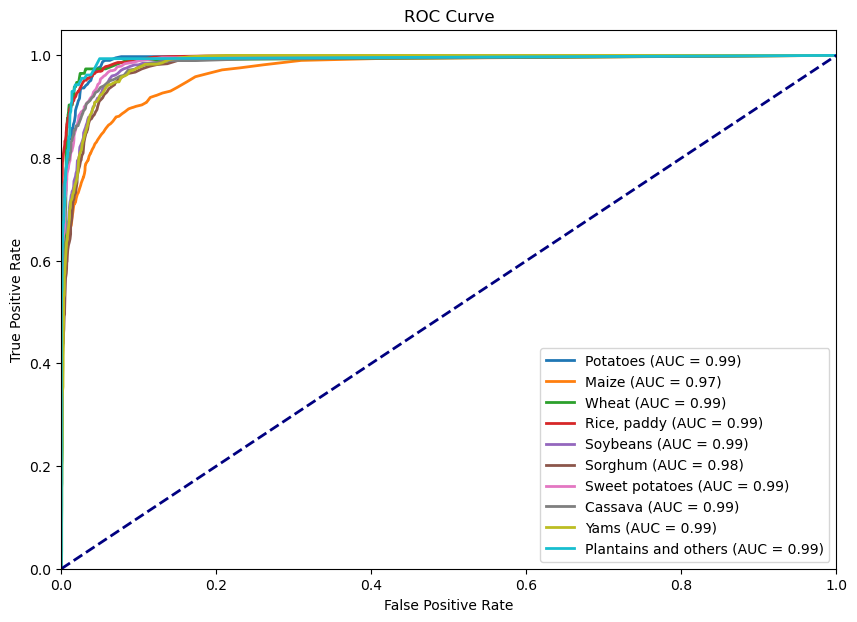

In [44]:
# Fitting the OneVsRestClassifier
rfc_ovr = OneVsRestClassifier(rfc)
rfc_ovr.fit(X_train, y_train)
rfc_y_probs = rfc.predict_proba(X_test)

# Plotting ROC curve for each class using item names
plt.figure(figsize=(10, 7))
for i, class_name in class_mapping.items():
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rfc_y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

- The RFC model performs much better, although it's scores can be improved, it holds well in the ROC curve with all items well above the midline and in the 90th percentiles.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


### Random Forest Regressor(Cross-validation scores):
- **Average Mean Squared Error:** 411454.7375042588
- **Average Mean Absolute Error:** 74.37309393832675
- **Average R2:** 0.9998665404283986

### Random Forest Classifier:
- **Accuracy:** 0.8325367321649849  
- **F1 Score:** 0.8326074205073901  

These are the models chosen for both Regression and Classification tasks based on their scores.

**Regressor**:
- Random Forest model is capabable of predicting with an MAE or 74.61 pesticide tonnes, meaning the prediction is only off by about 40 tonnes on average.

**Classifier**:
- Although not the most accurate and precise model, the Random Forest Classifier classifies well enough the crop based on the following features:
`hg/ha_yield	average_rain_fall_mm_per_year`	`pesticides_tonnes`	`avg_temp`

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The findings from the modelling of data using a regressor and classifier is that the chosen algorithms of RandomForest proved to be most effective in answering questions about how much pesticides in tonnes can be predicted and how well we can classify crop items.
* **Details:**
<br>
The results are satisfactory in the purpose it's meant to achieve, although there is always room to improve, considering that the pesticide predictor still has an absolute error of about ~74 tonnes which means if a farmer had to use our model he would still pay in excess of ~$200 000.00 or as a shortage of the same amount, and this could mean more labour costs to deal with manual removal of weeds or deal with pests that could have been with sufficient pesticides, or dealing with less yield due to damaged crops and lowered quality.
<br>
The impact the classifier could have on real-world use is that farmers seeking to optimize their operations by allocation of resources such as water and labour could incorrectly classify a crop item that needs more or less of the resources allocated and therefore have to deal with the costs of the lack predictive power within the model.